In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

In [46]:
accidents_by_vehicles2020 = pd.read_csv('/Users/anastasiasadova/Desktop/2020_accidents_vehicles_gu_bcn.csv')

In [47]:
accidents_by_vehicles2020

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,Descripcio_tipus_vehicle,Descripcio_model,Descripcio_marca,Descripcio_color,Descripcio_carnet,Antiguitat_carnet,Coordenada_UTM_X,Coordenada_UTM_Y,Latitud,Longitud
0,2020S000001,7,Horta-Guinardó,36,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,Dc,...,Turisme,C4 CACTUS BLUEHDI 100,CITROEN,Desconegut,B,4,430501.45,4586751.53,41.427474,2.167116
1,2020S000002,3,Sants-Montjuïc,16,la Bordeta,169409,Corts Catalanes,0203 0203,Dimecres,Dc,...,Taxi,V 220 D,MERCEDES-BENZ,Negre/Groc,B,11,428225.71,4580279.72,41.368985,2.140650
2,2020S000003,2,Eixample,8,l'Antiga Esquerra de l'Eixample,320704,Sarrià,0018 0018,Dimecres,Dc,...,Motocicleta,YP250R,YAMAHA,Negre,A,24,428532.59,4582672.59,41.390564,2.144037
3,2020S000003,2,Eixample,8,l'Antiga Esquerra de l'Eixample,320704,Sarrià,0018 0018,Dimecres,Dc,...,Turisme,LODGY,DACIA,Negre/Groc,B,9,428532.59,4582672.59,41.390564,2.144037
4,2020S000004,4,Les Corts,19,les Corts,101904,Doctor Fleming,0002 0002,Dimecres,Dc,...,Turisme,LEON,SEAT,Gris,B,4,427929.13,4582767.09,41.391361,2.136808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,2020S006276,1,Ciutat Vella,2,el Barri Gòtic,701266,Litoral (Llobregat),1070000,Dijous,Dj,...,Motocicleta,AGILITY CITY 125,KYMCO,Desconegut,B,16,431410.40,4581077.37,41.376447,2.178636
11695,2020S006276,1,Ciutat Vella,2,el Barri Gòtic,701266,Litoral (Llobregat),1070000,Dijous,Dj,...,Veh. mobilitat personal amb motor,Desconegut,Desconegut,Negre,Desconegut,Desconegut,431410.40,4581077.37,41.376447,2.178636
11696,2020S006277,2,Eixample,9,la Nova Esquerra de l'Eixample,18505,Aragó,0127 0127,Dijous,Dj,...,Motocicleta,SH 150,HONDA,Vermell,A,25,429362.84,4581954.15,41.384166,2.154051
11697,2020S006278,8,Nou Barris,44,Vilapicina i la Torre Llobeta,45701,Quinze,0007 0007,Dimarts,Dm,...,Turisme,CLIO,RENAULT,Blanc,Desconegut,Desconegut,431221.22,4586654.09,41.426658,2.175740


Options for dropna:
dropna(how='any') (Default): Drops rows with any NaN value.
dropna(how='all'): Drops rows only if all values are NaN.
dropna(subset=['Column1', 'Column2']): Drops rows with NaN values in specific columns.

#in case I want to plot nun values


plt.figure(figsize=(12, 8))
sns.heatmap(accidents_by_vehicles2023.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [48]:
accidents_by_vehicles2020.isnull().sum()

Numero_expedient            0
Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  0
Descripcio_dia_setmana      0
Dia_setmana                 0
Descripcio_tipus_dia        0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_vianant    0
Descripcio_tipus_vehicle    0
Descripcio_model            1
Descripcio_marca            0
Descripcio_color            0
Descripcio_carnet           0
Antiguitat_carnet           0
Coordenada_UTM_X            0
Coordenada_UTM_Y            0
Latitud                     0
Longitud                    0
dtype: int64

In [49]:
accidents_by_vehicles2020 = accidents_by_vehicles2020.dropna()

In [50]:
accidents_by_vehicles2020 = accidents_by_vehicles2020.drop_duplicates()

In [51]:
# Specify the columns to drop
columns_to_drop = ['Codi_districte', 'Codi_barri', 'Codi_carrer', 'Num_postal', 'Dia_setmana']

# Drop the columns
accidents_by_vehicles2020= accidents_by_vehicles2020.drop(columns=columns_to_drop)

# Verify the changes
accidents_by_vehicles2020.head()

,Numero_expedient,Nom_districte,Nom_barri,Nom_carrer,Descripcio_dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,...,Descripcio_tipus_vehicle,Descripcio_model,Descripcio_marca,Descripcio_color,Descripcio_carnet,Antiguitat_carnet,Coordenada_UTM_X,Coordenada_UTM_Y,Latitud,Longitud
0,2020S000001,Horta-Guinardó,la Font d'en Fargues,Maragall,Dimecres,Laboral,2020,1,Gener,1,...,Turisme,C4 CACTUS BLUEHDI 100,CITROEN,Desconegut,B,4,430501.45,4586751.53,41.427474,2.167116
1,2020S000002,Sants-Montjuïc,la Bordeta,Corts Catalanes,Dimecres,Laboral,2020,1,Gener,1,...,Taxi,V 220 D,MERCEDES-BENZ,Negre/Groc,B,11,428225.71,4580279.72,41.368985,2.140650
2,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Dimecres,Laboral,2020,1,Gener,1,...,Motocicleta,YP250R,YAMAHA,Negre,A,24,428532.59,4582672.59,41.390564,2.144037
3,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Dimecres,Laboral,2020,1,Gener,1,...,Turisme,LODGY,DACIA,Negre/Groc,B,9,428532.59,4582672.59,41.390564,2.144037
4,2020S000004,Les Corts,les Corts,Doctor Fleming,Dimecres,Laboral,2020,1,Gener,1,...,Turisme,LEON,SEAT,Gris,B,4,427929.13,4582767.09,41.391361,2.136808


In [52]:
rename_columns = {
    'Numero_expedient': 'Case_Number',
    'Nom_districte': 'District_Name',
    'Nom_barri': 'Neighborhood_Name',
    'Nom_carrer': 'Street_Name',
    'Descripcio_dia_setmana': 'Day_of_Week',
    'Descripcio_tipus_dia': 'Day_Type',
    'NK_Any': 'Year',
    'Mes_any': 'Month_Number',
    'Nom_mes': 'Month_Name',
    'Dia_mes': 'Day_of_Month',
    'Hora_dia': 'Hour_of_Day',
    'Descripcio_torn': 'Shift_Description',
    'Descripcio_causa_vianant': 'Pedestrian_Cause_Description',
    'Descripcio_tipus_vehicle': 'Vehicle_Type_Description',
    'Descripcio_model': 'Vehicle_Model',
    'Descripcio_marca': 'Vehicle_Brand',
    'Descripcio_color': 'Vehicle_Color',
    'Descripcio_carnet': 'License_Description',
    'Antiguitat_carnet': 'License_Age'
}



In [53]:
accidents_by_vehicles2020 = accidents_by_vehicles2020.rename(columns=rename_columns)

In [54]:
accidents_by_vehicles2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Day_Type,Year,Month_Number,Month_Name,Day_of_Month,...,Vehicle_Type_Description,Vehicle_Model,Vehicle_Brand,Vehicle_Color,License_Description,License_Age,Coordenada_UTM_X,Coordenada_UTM_Y,Latitud,Longitud
0,2020S000001,Horta-Guinardó,la Font d'en Fargues,Maragall,Dimecres,Laboral,2020,1,Gener,1,...,Turisme,C4 CACTUS BLUEHDI 100,CITROEN,Desconegut,B,4,430501.45,4586751.53,41.427474,2.167116
1,2020S000002,Sants-Montjuïc,la Bordeta,Corts Catalanes,Dimecres,Laboral,2020,1,Gener,1,...,Taxi,V 220 D,MERCEDES-BENZ,Negre/Groc,B,11,428225.71,4580279.72,41.368985,2.140650
2,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Dimecres,Laboral,2020,1,Gener,1,...,Motocicleta,YP250R,YAMAHA,Negre,A,24,428532.59,4582672.59,41.390564,2.144037
3,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Dimecres,Laboral,2020,1,Gener,1,...,Turisme,LODGY,DACIA,Negre/Groc,B,9,428532.59,4582672.59,41.390564,2.144037
4,2020S000004,Les Corts,les Corts,Doctor Fleming,Dimecres,Laboral,2020,1,Gener,1,...,Turisme,LEON,SEAT,Gris,B,4,427929.13,4582767.09,41.391361,2.136808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Dijous,Laboral,2020,12,Desembre,31,...,Motocicleta,AGILITY CITY 125,KYMCO,Desconegut,B,16,431410.40,4581077.37,41.376447,2.178636
11695,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Dijous,Laboral,2020,12,Desembre,31,...,Veh. mobilitat personal amb motor,Desconegut,Desconegut,Negre,Desconegut,Desconegut,431410.40,4581077.37,41.376447,2.178636
11696,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Dijous,Laboral,2020,12,Desembre,31,...,Motocicleta,SH 150,HONDA,Vermell,A,25,429362.84,4581954.15,41.384166,2.154051
11697,2020S006278,Nou Barris,Vilapicina i la Torre Llobeta,Quinze,Dimarts,Laboral,2020,12,Desembre,22,...,Turisme,CLIO,RENAULT,Blanc,Desconegut,Desconegut,431221.22,4586654.09,41.426658,2.175740


In [68]:
accidents_by_vehicles2020['Case_Number'] = accidents_by_vehicles2020['Case_Number'].str.strip()
accidents_by_vehicles2020['Case_Number'].value_counts()

2020S002362    12
2020S003559    10
2020S003865     9
2020S004975     9
2020S004957     8
               ..
2020S001567     1
2020S002027     1
2020S003486     1
2020S000951     1
2020S000001     1
Name: Case_Number, Length: 6257, dtype: int64

In [71]:
matching_data = accidents_by_vehicles2020[accidents_by_vehicles2020['Case_Number'] == '2020S002362']
matching_data
# Question is do we want to delete data with the same case number?

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Day_Type,Year,Month_Number,Month_Name,Day_of_Month,...,Vehicle_Brand,Vehicle_Color,License_Description,License_Age,Coordenada_UTM_X,Coordenada_UTM_Y,Latitud,Longitud,Date,Valid_License_Age
4398,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,SEAT,White,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4399,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,SYM,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4400,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,HONDA,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4401,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,PEUGEOT,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4402,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,SUZUKI,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4403,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,PIAGGIO,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4404,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,PIAGGIO,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4405,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,HONDA,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4406,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,SUZUKI,Unknown,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN
4407,2020S002362,Eixample,la Dreta de l'Eixample,Sant Joan,Friday,Working Day,2020,5,May,29,...,PEUGEOT,Black,Unknown,Unknown,430875.83,4583386.06,41.397195,2.171981,2020-05-29,NaN


In [55]:
accidents_by_vehicles2020.dtypes

Case_Number                      object
District_Name                    object
Neighborhood_Name                object
Street_Name                      object
Day_of_Week                      object
Day_Type                         object
Year                              int64
Month_Number                      int64
Month_Name                       object
Day_of_Month                      int64
Hour_of_Day                       int64
Shift_Description                object
Pedestrian_Cause_Description     object
Vehicle_Type_Description         object
Vehicle_Model                    object
Vehicle_Brand                    object
Vehicle_Color                    object
License_Description              object
License_Age                      object
Coordenada_UTM_X                float64
Coordenada_UTM_Y                float64
Latitud                         float64
Longitud                        float64
dtype: object

In [56]:
unknown_count = (accidents_by_vehicles2020['License_Age'] == 'Unknown').sum()
print(f"Number of 'Unknown' License_Age values: {unknown_count}")

Number of 'Unknown' License_Age values: 0


In [57]:
for column in accidents_by_vehicles2020.columns:
    unique_values = accidents_by_vehicles2020[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in column 'Case_Number':
['2020S000001    ' '2020S000002    ' '2020S000003    ' ...
 '2020S006276    ' '2020S006277    ' '2020S006278    ']
--------------------------------------------------
Unique values in column 'District_Name':
['Horta-Guinardó' 'Sants-Montjuïc' 'Eixample' 'Les Corts' 'Sant Andreu'
 'Sarrià-Sant Gervasi' 'Sant Martí' 'Nou Barris' 'Ciutat Vella' 'Gràcia'
 'Desconegut']
--------------------------------------------------
Unique values in column 'Neighborhood_Name':
["la Font d'en Fargues" 'la Bordeta' "l'Antiga Esquerra de l'Eixample"
 'les Corts' "la Dreta de l'Eixample" 'Sants - Badal' 'Sant Andreu'
 'Sarrià' 'la Verneda i la Pau' 'la Marina de Port' 'Horta' 'la Sagrera'
 'Baró de Viver' 'el Carmel' 'Vilapicina i la Torre Llobeta'
 "la Nova Esquerra de l'Eixample" 'el Barri Gòtic' 'la Sagrada Família'
 'la Trinitat Vella' 'Sant Antoni' 'la Font de la Guatlla'
 'la Maternitat i Sant Ramon' 'la Vila de Gràcia' 'el Besòs i el Maresme'
 'Porta' 'les Tres T

In [64]:
translation_dict = {
    # Shift_Description
    'Nit': 'Night',
    'Matí': 'Morning',
    'Tarda': 'Afternoon',
    
     # Months
    'Gener': 'January',
    'Febrer': 'February',
    'Març': 'March',
    'Abril': 'April',
    'Maig': 'May',
    'Juny': 'June',
    'Juliol': 'July',
    'Agost': 'August',
    'Setembre': 'September',
    'Octubre': 'October',
    'Novembre': 'November',
    'Desembre': 'December',

    # Day Type
    'Laboral': 'Working Day',

    # Pedestrian_Cause_Description
    'No és causa del  vianant': 'Not the pedestrian’s fault',
    'Desobeir el senyal del semàfor': 'Disobey traffic light signal',
    'Altres': 'Others',
    'Transitar a peu per la calçada': 'Walking on the road',
    'Creuar per fora pas de vianants': 'Crossing outside pedestrian crossing',
    'Desobeir altres senyals': 'Disobey other signals',

    # Vehicle_Type_Description
    'Turisme': 'Car',
    'Taxi': 'Taxi',
    'Motocicleta': 'Motorcycle',
    'Ciclomotor': 'Moped',
    'Autobús': 'Bus',
    'Furgoneta': 'Van',
    'Veh. mobilitat personal amb motor': 'Personal mobility vehicle with motor',
    'Camió rígid <= 3,5 tones': 'Rigid truck <= 3.5 tons',
    'Bicicleta': 'Bicycle',
    'Autobús articulat': 'Articulated bus',
    'Tot terreny': 'SUV',
    'Pick-up': 'Pickup truck',
    'Tractor camió': 'Truck tractor',
    'Altres vehicles amb motor': 'Other motor vehicles',
    'Camió rígid > 3,5 tones': 'Rigid truck > 3.5 tons',
    'Desconegut': 'Unknown',
    'Veh. mobilitat personal sense motor': 'Personal mobility vehicle without motor',
    "Maquinària d'obres i serveis": 'Construction and service machinery',
    'Microbús <= 17': 'Minibus <= 17',
    'Tren o tramvia': 'Train or tram',
    'Quadricicle < 75 cc': 'Quadricycle < 75 cc',
    'Altres vehicles sense motor': 'Other non-motor vehicles',
    'Autocaravana': 'Motorhome',
    'Ambulància': 'Ambulance',
    
    # Day_of_Week
    'Dimecres': 'Wednesday',
    'Dijous': 'Thursday',
    'Divendres': 'Friday',
    'Dissabte': 'Saturday',
    'Diumenge': 'Sunday',
    'Dilluns': 'Monday',
    'Dimarts': 'Tuesday',

    # Vehicle_Color
    'Desconegut': 'Unknown',
    'Negre/Groc': 'Black/Yellow',
    'Negre': 'Black',
    'Gris': 'Gray',
    'Verd': 'Green',
    'Vermell': 'Red',
    'Blanc': 'White',
    'Altres': 'Others',
    'Blau': 'Blue',
    'granate': 'Maroon',
    'Groc': 'Yellow',
    'Platejat': 'Silver',
    'Taronja': 'Orange',
    'Daurat': 'Gold',
    'Marró': 'Brown',
    'Beige': 'Beige',
    'Violeta': 'Violet',
    'Rosa': 'Pink',

    # Permits or Permissions
    'Sense permís': 'Without permit',
    'Desconegut': 'Unknown',  # Already included above for consistency
    'Es desconeix': 'Unknown'
}

# Apply the translations
accidents_by_vehicles2020.replace(translation_dict, inplace=True)

if all(col in accidents_by_vehicles2020.columns for col in ['Month_Number', 'Year', 'Day_of_Month']):
    # Combine the columns into a single datetime column
    accidents_by_vehicles2020['Date'] = pd.to_datetime(
        accidents_by_vehicles2020['Year'].astype(str) + '-' +
        accidents_by_vehicles2020['Month_Number'].astype(str) + '-' +
        accidents_by_vehicles2020['Day_of_Month'].astype(str),
        format='%Y-%m-%d'
    )   

# Convert 'License_Age' to numeric, if not already
accidents_by_vehicles2020['Valid_License_Age'] = pd.to_numeric(accidents_by_vehicles2020['License_Age'], errors='coerce')

# Remove rows with NaN (invalid License_Age)
valid_license_ages = accidents_by_vehicles2020[~accidents_by_vehicles2020['License_Age'].isna()]
valid_license_ages
    
# Save the translated dataset
output_path = '/Users/anastasiasadova/Desktop/2020_accidents_vehicles_edited.csv'
accidents_by_vehicles2020.to_csv(output_path, index=False)

print(f"Translated dataset saved to {output_path}")

Translated dataset saved to /Users/anastasiasadova/Desktop/2020_accidents_vehicles_edited.csv


In [59]:
accidents_by_vehicles2020['License_Age'].value_counts()

Unknown    2019
2           471
1           465
4           382
12          355
           ... 
63            5
62            2
68            2
67            2
64            1
Name: License_Age, Length: 68, dtype: int64

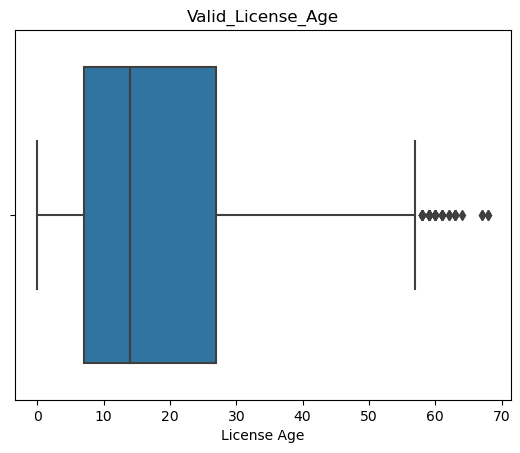

In [63]:
sns.boxplot(x=accidents_by_vehicles2020['Valid_License_Age'])
plt.title('Valid_License_Age')
plt.xlabel('License Age')
plt.show()

# do we want to drop outliers? but if we have peole aged 95 in data set its possible
# that they might have lisenve 68 years

In [61]:
accidents_by_vehicles2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Day_Type,Year,Month_Number,Month_Name,Day_of_Month,...,Vehicle_Model,Vehicle_Brand,Vehicle_Color,License_Description,License_Age,Coordenada_UTM_X,Coordenada_UTM_Y,Latitud,Longitud,Date
0,2020S000001,Horta-Guinardó,la Font d'en Fargues,Maragall,Wednesday,Working Day,2020,1,January,1,...,C4 CACTUS BLUEHDI 100,CITROEN,Unknown,B,4,430501.45,4586751.53,41.427474,2.167116,2020-01-01
1,2020S000002,Sants-Montjuïc,la Bordeta,Corts Catalanes,Wednesday,Working Day,2020,1,January,1,...,V 220 D,MERCEDES-BENZ,Black/Yellow,B,11,428225.71,4580279.72,41.368985,2.140650,2020-01-01
2,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Wednesday,Working Day,2020,1,January,1,...,YP250R,YAMAHA,Black,A,24,428532.59,4582672.59,41.390564,2.144037,2020-01-01
3,2020S000003,Eixample,l'Antiga Esquerra de l'Eixample,Sarrià,Wednesday,Working Day,2020,1,January,1,...,LODGY,DACIA,Black/Yellow,B,9,428532.59,4582672.59,41.390564,2.144037,2020-01-01
4,2020S000004,Les Corts,les Corts,Doctor Fleming,Wednesday,Working Day,2020,1,January,1,...,LEON,SEAT,Gray,B,4,427929.13,4582767.09,41.391361,2.136808,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Thursday,Working Day,2020,12,December,31,...,AGILITY CITY 125,KYMCO,Unknown,B,16,431410.40,4581077.37,41.376447,2.178636,2020-12-31
11695,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Thursday,Working Day,2020,12,December,31,...,Unknown,Unknown,Black,Unknown,Unknown,431410.40,4581077.37,41.376447,2.178636,2020-12-31
11696,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Thursday,Working Day,2020,12,December,31,...,SH 150,HONDA,Red,A,25,429362.84,4581954.15,41.384166,2.154051,2020-12-31
11697,2020S006278,Nou Barris,Vilapicina i la Torre Llobeta,Quinze,Tuesday,Working Day,2020,12,December,22,...,CLIO,RENAULT,White,Unknown,Unknown,431221.22,4586654.09,41.426658,2.175740,2020-12-22


In [33]:
accidents_by_vehicles2020['Date']

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
11694   2020-12-31
11695   2020-12-31
11696   2020-12-31
11697   2020-12-22
11698   2020-12-22
Name: Date, Length: 11698, dtype: datetime64[ns]

In [39]:
accidents_by_vehicles2020['Vehicle_Color'].unique()

array(['Unknown', 'Black/Yellow', 'Black', 'Gray', 'Green', 'Red',
       'White', 'Others', 'Blue', 'Maroon', 'Yellow', 'Silver', 'Orange',
       'Gold', 'Brown', 'Beige', 'Violet', 'Pink'], dtype=object)

In [ ]:
#accidents_by_vehicles2020.to_csv('/Users/anastasiasadova/Desktop/accidents_by_vehicles2020.csv', index=False)